The competition is [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [362]:
import numpy as np
import pandas as pd

from scipy import stats

import missingno as msno

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Utils

In [363]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 2, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1, fit=stats.norm)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
    plt.show()

In [364]:
def corr_numerical_features(df, target):
    corr_num_col = df.corr(numeric_only=True)[target].sort_values(ascending = False).to_frame()
    
    f, ax = plt.subplots(figsize = (30, 1))

    sns.heatmap(corr_num_col.T, annot=True, fmt='.2f', annot_kws={'size': 14})

    plt.title('Correlation of Numerical Features', fontsize=18, pad=25)
    plt.xticks(rotation=85, fontsize=14)
    plt.yticks(color='dodgerblue')
    
    plt.show()
    
    return corr_num_col

In [365]:
def draw_scatter_plot(df, x, y):
    plt.figure(figsize=(15, 6))
    plt.scatter(x=x, y=y, data=df, color='crimson', alpha=0.4)
    plt.xlabel(x, weight = 'bold')
    plt.ylabel(y, weight = 'bold')
    plt.show()

In [366]:
def msv_bar_plot(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, pad=15)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    
    plt.xlabel('Columns', size=15)
    plt.ylabel('Missing values percentage', size=15)
    plt.yticks(weight ='bold')
    
    plt.show()

In [367]:
def two_chart_homoscedasticity_plot(df, x, y):
    fig = plt.figure(constrained_layout=True, figsize=(15, 7))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Scatter Plot', fontsize=18)
    sns.scatterplot(data=df, x=x, y=y, ax=ax1, color='crimson', alpha=0.4)
    sns.regplot(x=df[x], y=df[y], ax=ax1)
    
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Residual Plot', fontsize=18)
    sns.residplot(x=df[x], y=df[y], ax=ax2)
    
    plt.show()

# Load Datasets

In [368]:
train = pd.read_csv('./datasets/boston_2/train.csv')
test = pd.read_csv('./datasets/boston_2/test.csv')

train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [369]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [370]:
print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1460, 81) (1459, 80)
New Nulls :  7829 7878


In [371]:
testId = test['Id'] #.reset_index(drop=True)

train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

In [372]:
print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1460, 80) (1459, 79)
New Nulls :  7829 7878


# Describe Variables

In [373]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [374]:
category_var = train.select_dtypes(include = 'object')
num_var = train.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  43
Number of numerical features are:  37


In [375]:
train_describe_numeric = train.describe()
train_describe_numeric.T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [376]:
train_describe_categorical = train.describe(include=['O'])
train_describe_categorical.T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Univariate Profiling

The starting point for understanding the nature of any variable is to characterize the shape of its distribution. To begin with, we can gain an adequate perspective of the variable through a histogram. 

## SalePrice

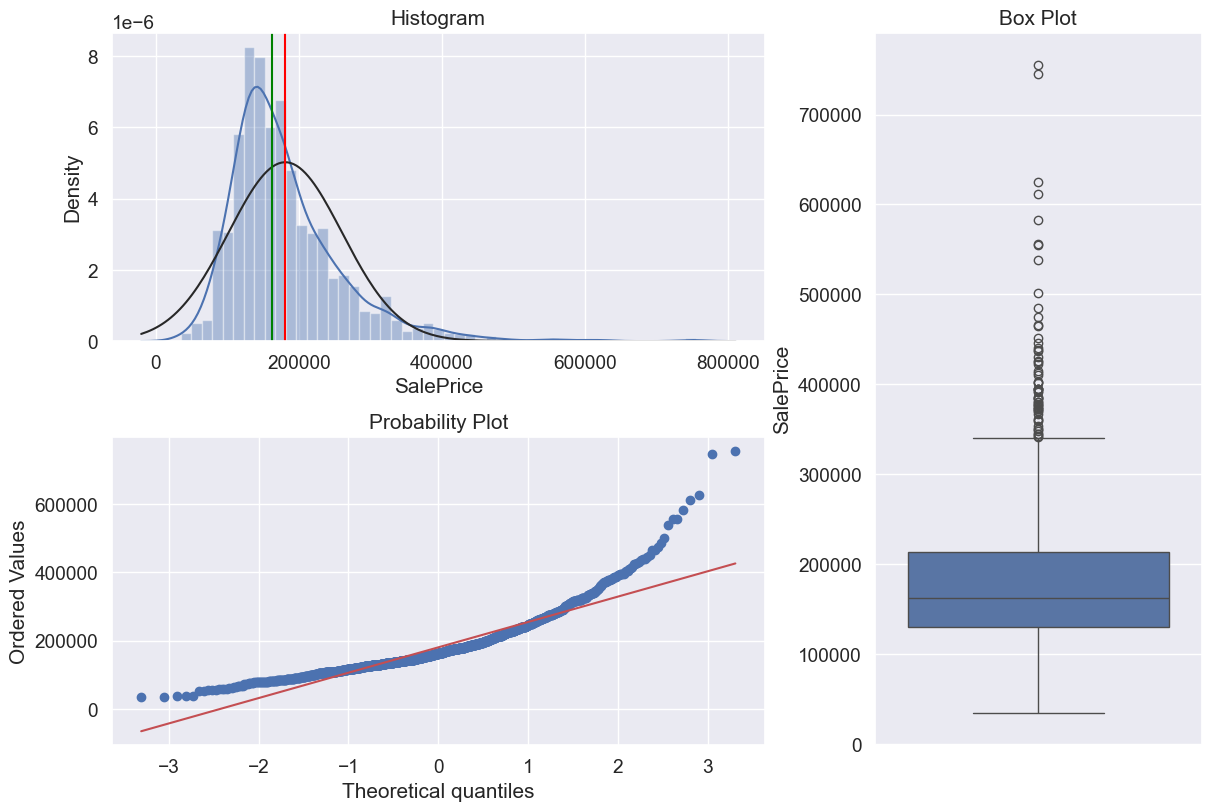

In [377]:
three_chart_plot(train, 'SalePrice')

In [378]:
# Skew and kurt
print("Skewness : %f" % train['SalePrice'].skew())
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


'SalePrice' is not normal. It shows peakedness, positive skewness and does not follow the diagonal line.

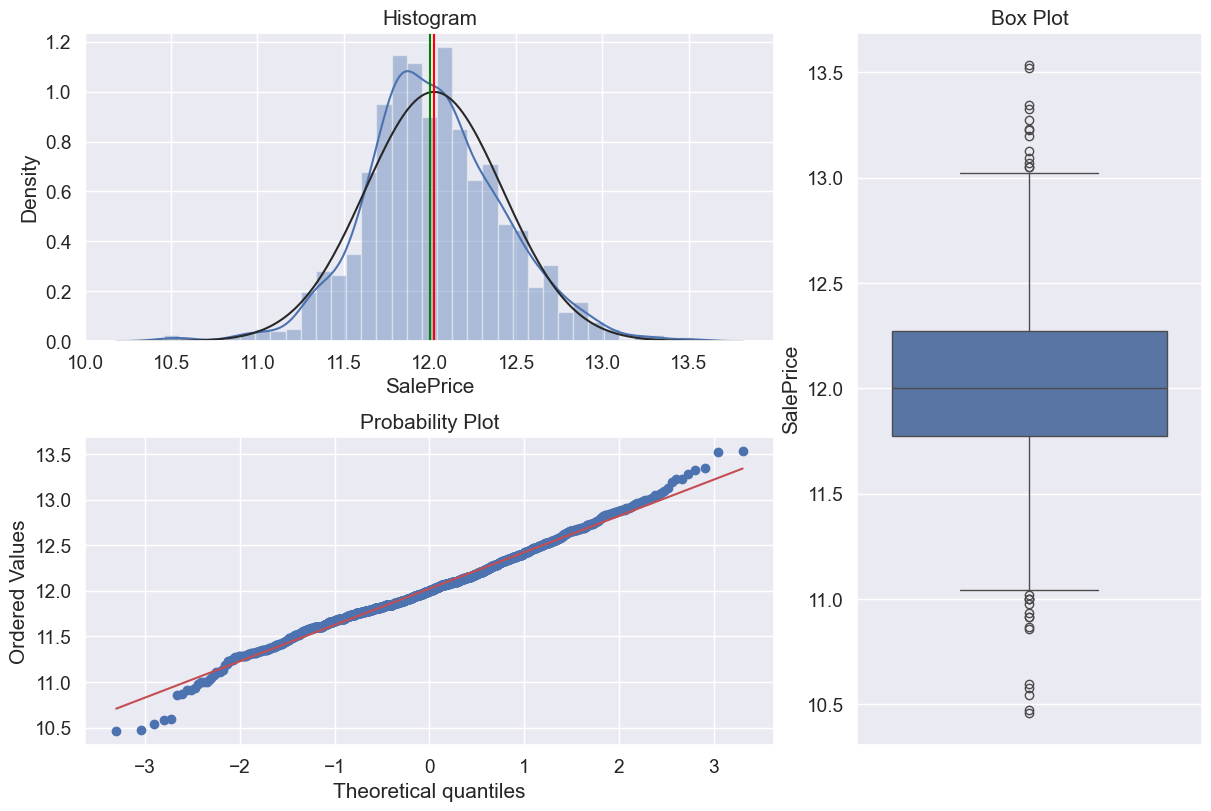

In [379]:
# applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

three_chart_plot(train, 'SalePrice')

# Bivariate Profiling

## Correlation Matrix

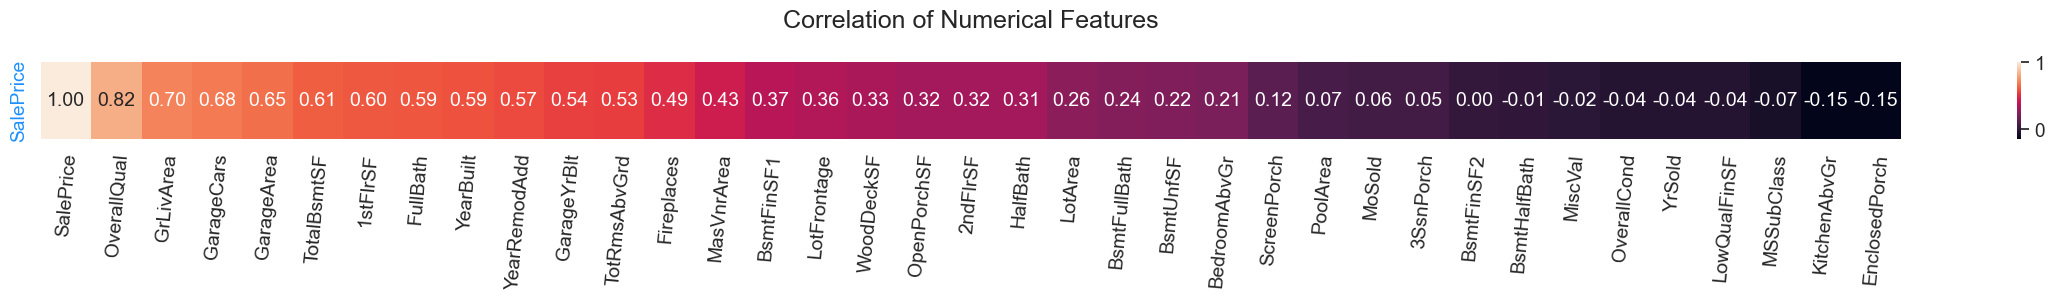

,SalePrice
SalePrice,1.000000
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


In [380]:
corr_num = corr_numerical_features(train, 'SalePrice')
corr_num

In [381]:
k = 10
cols_top_corr_num = corr_num[:k].index

## Numeric Variables

The scatterplot matrix provides a quick and simple method of not only assessing the strength and magnitude of any bivariate relationship, but also a means of identifying any nonlinear patterns that might be hidden.

Of the many types of scatterplots, one format particularly suited to multivariate techniques is the scatterplot matrix, in which the scatterplots are represented for all combinations of variables in the lower portion of the matrix. The diagonal contains histograms of the variables.

### GrLivArea

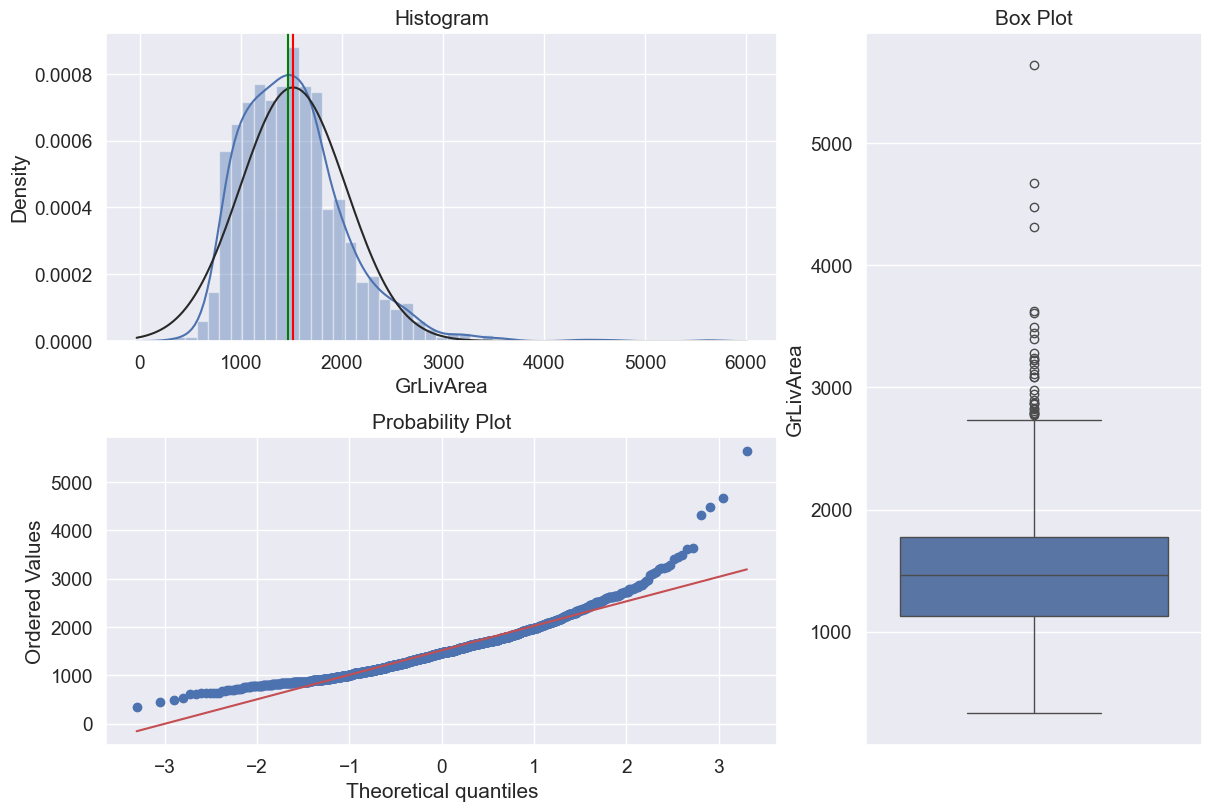

In [382]:
three_chart_plot(train, 'GrLivArea') 

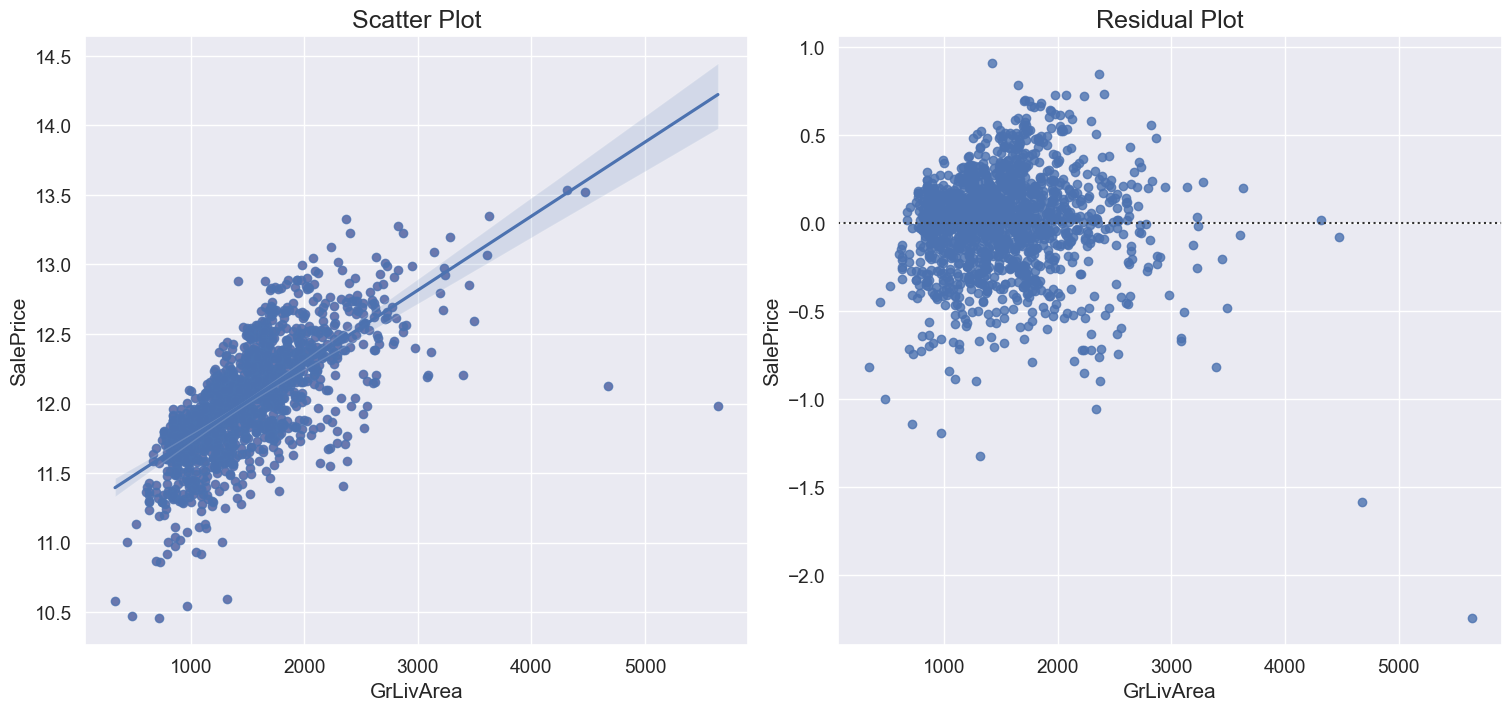

In [383]:
two_chart_homoscedasticity_plot(train, 'GrLivArea', 'SalePrice')

We can observe that there is almost a linear relationship between Living Area and the Sale Price. If the area is huge then price should also have also been high but the two rightmost points suggest something else. These two points are outliers. We will drop both of them below.

In [384]:
train = train[train['GrLivArea'] < 4500]

In [385]:
print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1458, 80) (1459, 79)
New Nulls :  7822 7878


## Group Differences

<Axes: xlabel='SalePrice', ylabel='HouseStyle'>

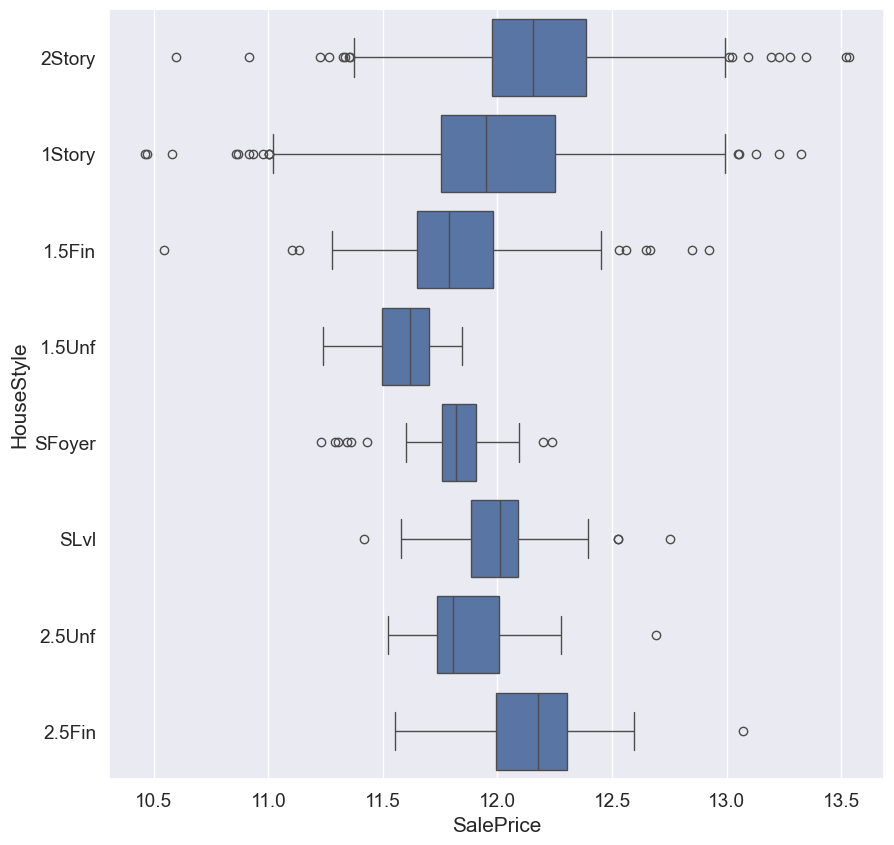

In [386]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.set(font_scale=1.25)
sns.boxplot(data=train, y="HouseStyle", x="SalePrice")

# Missing Values

<Axes: >

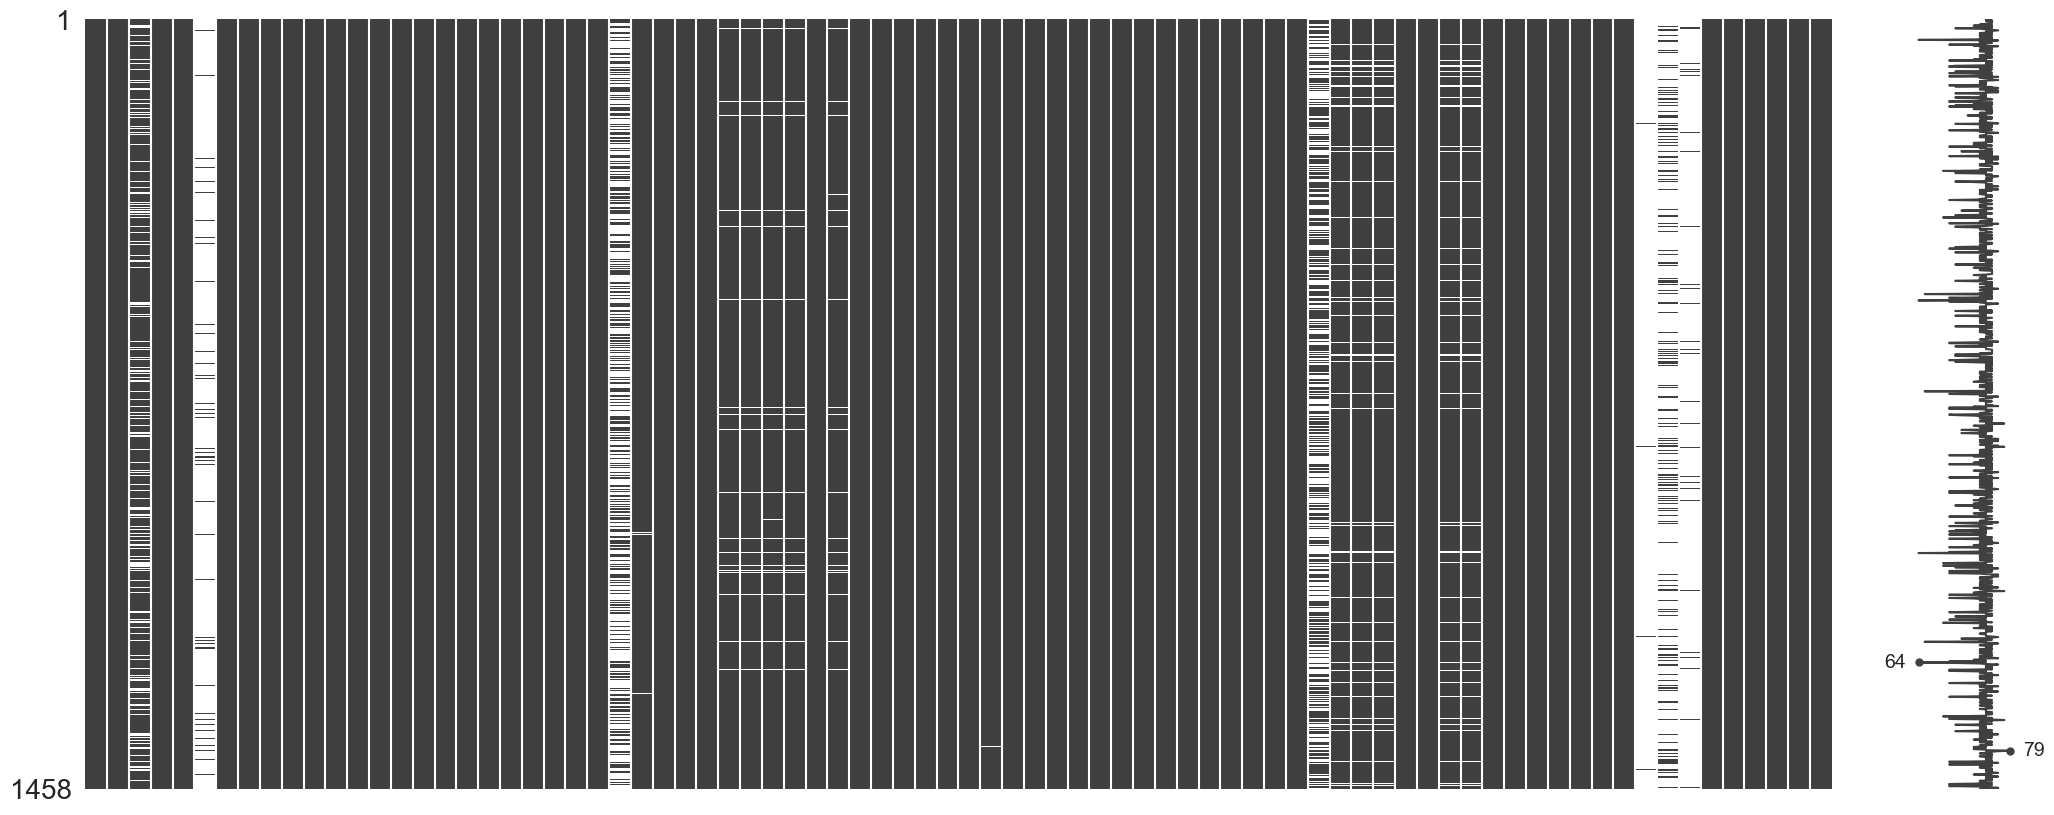

In [387]:
msno.matrix(train)

In [388]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
        
    d = {'Columns' : indices, 
         'Count of Null Values' : values, 
         'Approximate Percentage of Null Values' : percentages}
        
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [389]:
null_table_train = null_table(train)
null_table_train.sort_values(by='Approximate Percentage of Null Values', ascending=False)

,Columns,Count of Null Values,Approximate Percentage of Null Values
71,PoolQC,1452,99.588477
73,MiscFeature,1404,96.296296
5,Alley,1367,93.758573
72,Fence,1177,80.727023
24,MasVnrType,872,59.807956
...,...,...,...
75,MoSold,0,0.000000
76,YrSold,0,0.000000
77,SaleType,0,0.000000
78,SaleCondition,0,0.000000


We can see that there are 4 features having more than 80% missing values. We will drop these 4 features.

In [390]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

train = train.drop(cols_to_drop, axis = 1)
test = test.drop(cols_to_drop, axis = 1)

In [391]:
print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1458, 76) (1459, 75)
New Nulls :  2422 2493


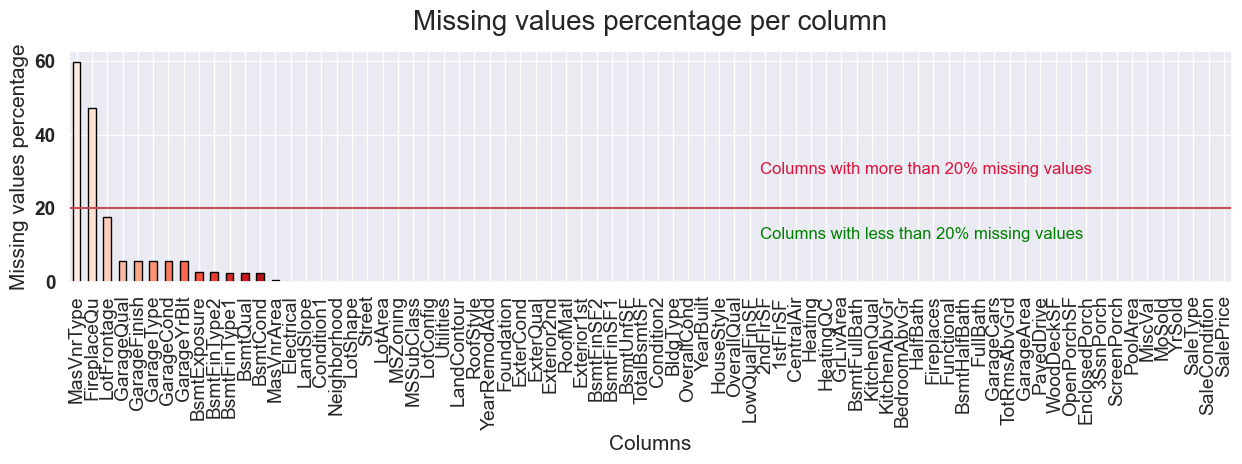

In [392]:
msv_bar_plot(train, 20, color=sns.color_palette('Reds',15))

In [393]:
def filling_null(features):   
    features['Functional'] = features['Functional'].fillna('Typ')
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))  
    
    features = features.drop(columns=['MSSubClass'])
    
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    cat_features = features.select_dtypes(include = 'object').columns
    num_features = features.select_dtypes(exclude = 'object').columns
    
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
        
    return features

In [394]:
train = filling_null(train)
test = filling_null(test)

print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1458, 75) (1459, 74)
New Nulls :  0 0


# Feature Creation

In [395]:
def new_features(features):
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    features = features.drop(columns=['Fireplaces', 'GarageArea', 'PoolArea'])
    
    # Adding total sqfootage features. In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.
    
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    features = features.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])
    
    # Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
    # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.
    
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    features = features.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])
    
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])
    features = features.drop(columns=['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

    # Add years since remodel
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)
    features = features.drop(columns=['YrSold', 'YearRemodAdd'])

    return features

In [396]:
print('Old shapes : ', train.shape, test.shape)
print('Old nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

train = new_features(train)
test = new_features(test)

print('New shapes : ', train.shape, test.shape)
print('New nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

Old shapes :  (1458, 75) (1459, 74)
Old nulls :  0 0
New shapes :  (1458, 68) (1459, 67)
New nulls :  0 0


# Skew Handling

In [397]:
from sklearn.preprocessing import PowerTransformer

def yeo_trans(df):
    numerical_columns = df.select_dtypes(exclude = 'object').columns
    skewed_features = df[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    high_skew = skewed_features[skewed_features > 0.5]
    skewed_features = high_skew.index
    
    yeojohnTr = PowerTransformer(standardize=True)
        
    for column in skewed_features:
        # print(column)
        old_skew = df[column].skew()
        df[column] = yeojohnTr.fit_transform(df[column].to_frame())
        new_skew = df[column].skew()
        # print("Skew Change : ", old_skew, new_skew)
        
    return df
    

In [398]:
print('Old shapes : ', train.shape, test.shape)
print('Old nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

train = yeo_trans(train)
test = yeo_trans(test)

print('New shapes : ', train.shape, test.shape)
print('New nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

Old shapes :  (1458, 68) (1459, 67)
Old nulls :  0 0
MiscVal
HasPool
LotArea
LowQualFinSF
KitchenAbvGr
BsmtFinSF2
MasVnrArea
Total_porch_sf
LotFrontage
WoodDeckSF
GrLivArea
BsmtUnfSF
TotalSF
BsmtFinSF1
OverallCond
TotRmsAbvGrd
YearsSinceRemodel
MiscVal
LowQualFinSF
HasPool
KitchenAbvGr
BsmtFinSF2
LotArea
MasVnrArea
Total_porch_sf
WoodDeckSF
TotalSF
BsmtFinSF1
GrLivArea
BsmtUnfSF
TotRmsAbvGrd
Total_Bathrooms
LotFrontage
New shapes :  (1458, 68) (1459, 67)
New nulls :  0 0


# Dummies

In [399]:
total = pd.concat([train, test])

print('New Shape : ', train.shape, test.shape, total.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum(), total.isnull().sum().sum())

New Shape :  (1458, 68) (1459, 67) (2917, 68)
New Nulls :  0 0 1459


In [400]:
total = pd.get_dummies(total, drop_first=True).reset_index(drop=True)
total.shape

(2917, 239)

In [401]:
total.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.170838,-0.139979,7,-0.477908,2003,1.233710,0.802294,-0.359662,-0.886362,-0.134746,...,False,False,False,False,True,False,False,False,True,False
1,0.525501,0.108672,6,2.010085,1976,-0.817134,1.017760,-0.359662,-0.433331,-0.134746,...,False,False,False,False,True,False,False,False,True,False
2,-0.026282,0.419553,7,-0.477908,2001,1.197063,0.574615,-0.359662,-0.047243,-0.134746,...,False,False,False,False,True,False,False,False,True,False


In [402]:
np.isinf(total).values.sum()

np.int64(0)

In [403]:
print('Old Shape : ', train.shape, test.shape)
print('Old Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

train_len = len(train)
train = total.iloc[0:train_len, :]
test = total.iloc[train_len:, :]
test = test.drop(columns=['SalePrice'])

print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

Old Shape :  (1458, 68) (1459, 67)
Old Nulls :  0 0
New Shape :  (1458, 239) (1459, 238)
New Nulls :  0 0


# Save Dataset 

In [404]:
test = test.reset_index(drop=True)
test['Id'] = testId

print('New Shape : ', train.shape, test.shape)
print('New Nulls : ', train.isnull().sum().sum(), test.isnull().sum().sum())

New Shape :  (1458, 239) (1459, 239)
New Nulls :  0 0


In [405]:
train.to_csv('./datasets/boston_2/train_processed.csv', index=False)
test.to_csv('./datasets/boston_2/test_processed.csv', index=False)

In [406]:
train.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.170838,-0.139979,7,-0.477908,2003,1.233710,0.802294,-0.359662,-0.886362,-0.134746,...,False,False,False,False,True,False,False,False,True,False
1,0.525501,0.108672,6,2.010085,1976,-0.817134,1.017760,-0.359662,-0.433331,-0.134746,...,False,False,False,False,True,False,False,False,True,False
2,-0.026282,0.419553,7,-0.477908,2001,1.197063,0.574615,-0.359662,-0.047243,-0.134746,...,False,False,False,False,True,False,False,False,True,False


In [407]:
test.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,0.554812,0.528189,5,6.0,1961,-0.792269,0.563679,2.666358,-0.439708,-0.098431,...,False,False,False,True,False,False,False,True,False,1461
1,0.600319,1.012427,6,6.0,1958,1.163005,0.982248,-0.375141,-0.079227,-0.098431,...,False,False,False,True,False,False,False,True,False,1462
2,0.278501,0.936778,5,5.0,1997,-0.792269,0.881483,-0.375141,-0.906157,-0.098431,...,False,False,False,True,False,False,False,True,False,1463
